In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model
from scipy.optimize import minimize

rcParams.update({'font.size': 18})

In [91]:
f=np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])
X=np.arange(1,25)

(24, 10)


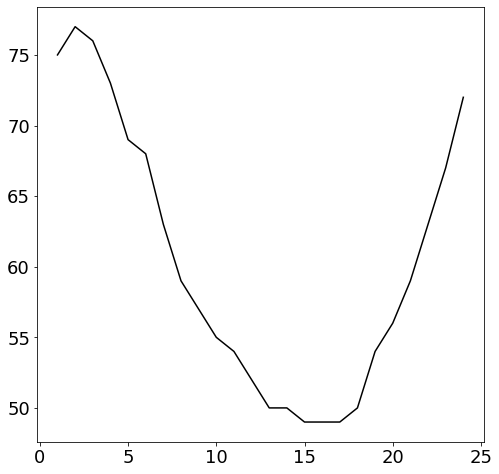

In [92]:
n=f.shape[0]
M = 10 # Polynomial degree
 
phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(X,j) # Build matrix A
    
plt.figure()
plt.plot(X,f,color='k')
print(phi.shape)

D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.845602764194162, tolerance: 0.21445
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.02187507991006, tolerance: 0.21445
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95501e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


[77.41222053]
[76.40407593]


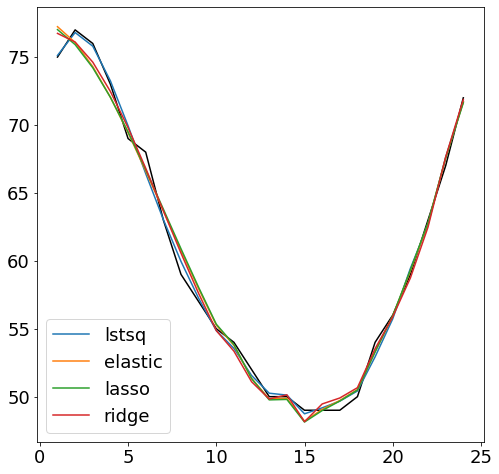

In [107]:
## Different regressions
plt.figure()
plt.plot(X,f,color='k')

lam = 0.1
E1 = 0
E2 = 0
E3 = 0
E4 = 0

A1 = np.zeros(M)
A2 = np.zeros(M)
A3 = np.zeros(M)
A4 = np.zeros(M)

a1 = np.linalg.lstsq(phi,f,rcond=None)[0]
f1 = phi @ a1
E1 = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f1,label='lstsq')

def obj(x,a,b):
    return np.linalg.norm(a-(b+x),ord=2)/np.linalg.norm(a,ord=2)

regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
regr3.fit(phi, f)  
a2 = regr3.coef_
f2 = phi @ a2
constr = ({'type': 'ineq', 'fun': lambda x:  0})
res = minimize(obj, 75, method='SLSQP',args=(f,f2),constraints=constr)
f2=f2+res.x
E2 = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f2,label='elastic')

regr4 = linear_model.Lasso(alpha=0.8, copy_X=True, max_iter=10**5,random_state=0)
regr4.fit(phi, f)  
a3 = regr4.coef_
f3 = phi @ a3
res = minimize(obj, 75, method='SLSQP',args=(f,f3),constraints=constr)
f3=f3+res.x
E3 = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f3,label='lasso')

ridge = linear_model.Ridge(alpha=1.0).fit(phi,f)
a4 = ridge.coef_
f4 = phi @ a4
res = minimize(obj, 75, method='SLSQP',args=(f,f4),constraints=constr)
f4=f4+res.x
E4 = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f4,label='ridge')
plt.legend()
    
A1 = a1
A2 = a2
A3 = a3
A4 = a4
    
Err = np.column_stack((E1,E2,E3,E4))

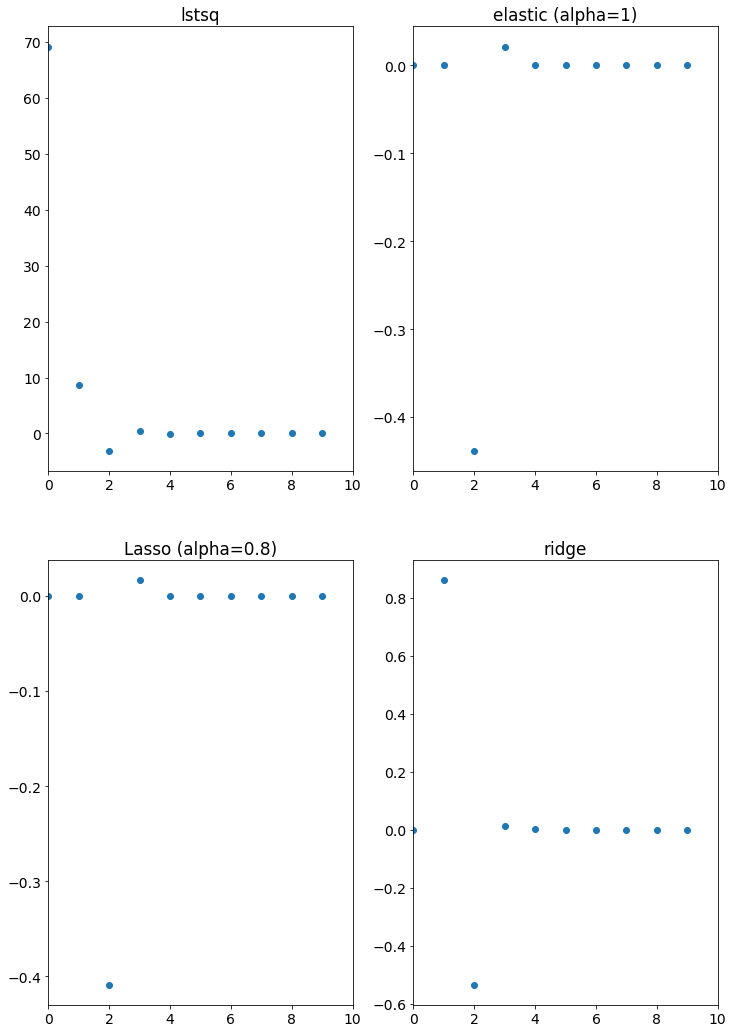

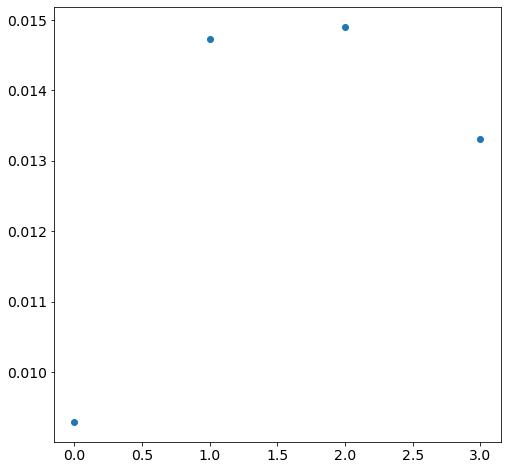

In [108]:
plt.rcParams['figure.figsize'] = [12, 18]
rcParams.update({'font.size': 14})
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].plot(A1.T,'o')
axs[0].set_title('lstsq')
axs[1].plot(A2.T,'o')
axs[1].set_title('elastic (alpha=1)')
axs[2].plot(A3.T,'o')
axs[2].set_title('Lasso (alpha=0.8)')
axs[3].plot(A4.T,'o')
axs[3].set_title('ridge')

for ax in axs:
    ax.set_xlim(0,M)
    
plt.rcParams['figure.figsize'] = [8, 8]

plt.figure()
plt.plot(Err.T,'o')
plt.show()

D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2226.466394769839, tolerance: 0.5389958333333333
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2230.9947997079125, tolerance: 0.5389958333333333
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95501e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


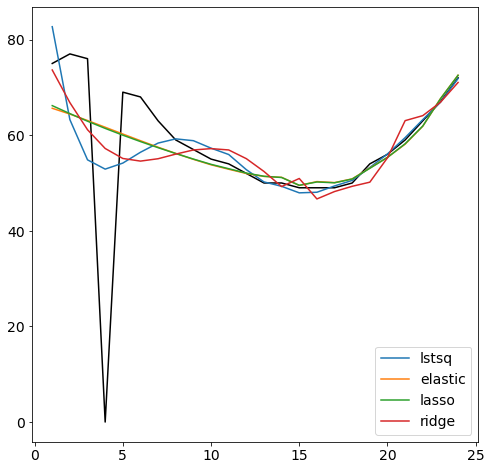

In [113]:
f=np.array([75,77,76,0,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])
## Different regressions
plt.figure()
plt.plot(X,f,color='k')

lam = 0.1
E1 = 0
E2 = 0
E3 = 0
E4 = 0

A1 = np.zeros(M)
A2 = np.zeros(M)
A3 = np.zeros(M)
A4 = np.zeros(M)

a1 = np.linalg.lstsq(phi,f,rcond=None)[0]
f1 = phi @ a1
E1 = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f1,label='lstsq')

def obj(x,a,b):
    return np.linalg.norm(a-(b+x),ord=2)/np.linalg.norm(a,ord=2)

regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
regr3.fit(phi, f)  
a2 = regr3.coef_
f2 = phi @ a2
constr = ({'type': 'ineq', 'fun': lambda x:  0})
res = minimize(obj, 75, method='SLSQP',args=(f,f2),constraints=constr)
f2=f2+res.x
E2 = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f2,label='elastic')

regr4 = linear_model.Lasso(alpha=0.8, copy_X=True, max_iter=10**5,random_state=0)
regr4.fit(phi, f)  
a3 = regr4.coef_
f3 = phi @ a3
res = minimize(obj, 75, method='SLSQP',args=(f,f3),constraints=constr)
f3=f3+res.x
E3 = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f3,label='lasso')

ridge = linear_model.Ridge(alpha=1.0).fit(phi,f)
a4 = ridge.coef_
f4 = phi @ a4
res = minimize(obj, 75, method='SLSQP',args=(f,f4),constraints=constr)
f4=f4+res.x
E4 = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
plt.plot(X,f4,label='ridge')
plt.legend()
    
A1 = a1
A2 = a2
A3 = a3
A4 = a4
    
Err = np.column_stack((E1,E2,E3,E4))

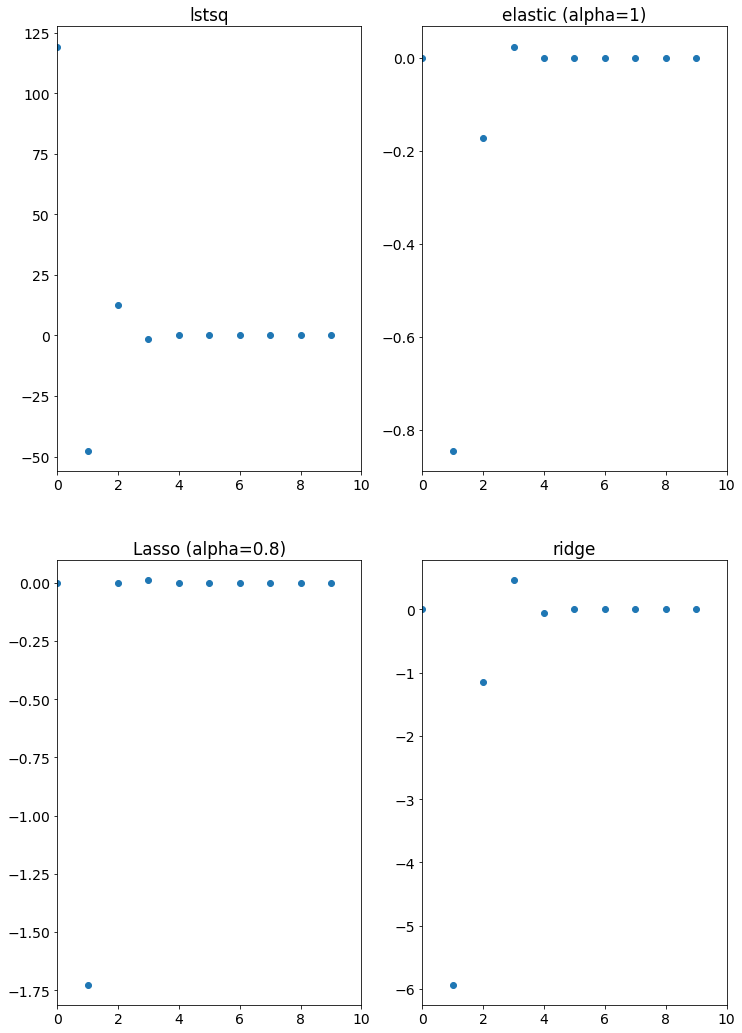

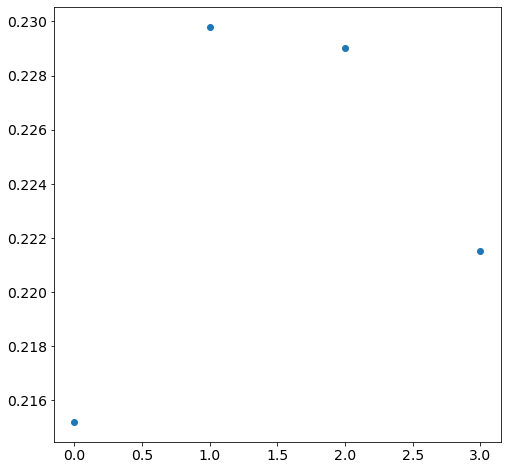

In [114]:
plt.rcParams['figure.figsize'] = [12, 18]
rcParams.update({'font.size': 14})
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].plot(A1.T,'o')
axs[0].set_title('lstsq')
axs[1].plot(A2.T,'o')
axs[1].set_title('elastic (alpha=1)')
axs[2].plot(A3.T,'o')
axs[2].set_title('Lasso (alpha=0.8)')
axs[3].plot(A4.T,'o')
axs[3].set_title('ridge')

for ax in axs:
    ax.set_xlim(0,M)
    
plt.rcParams['figure.figsize'] = [8, 8]

plt.figure()
plt.plot(Err.T,'o')
plt.show()